每个球迷心中都有一个属于自己的迈克尔·乔丹、科比·布莱恩特、勒布朗·詹姆斯。 

本案例将用jupyter notebook完成NBA菜鸟数据分析初探。

# 数据解释

![字段解释](./img/字段解释.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 载入数据

In [2]:
data=pd.read_csv('./data/nba_2017_nba_players_with_salary.csv')
data.head()

# 原来是威少暴走的16-17赛季呀，啊呀呀！！！

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


我们可以看到该数据的前五列是按当年的得分榜排序的，分别是威少、詹皇、地表最强175、浓眉哥和考神。而数据包含39列，即不同维度的技术统计。而此份数据提供了这300+球员的众多项比赛数据，我希望通过数据分析来发现其中的有趣的信息。

In [3]:
data.shape

(342, 38)

In [4]:
# 描述统计
data.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,320.000000,342.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,217.269006,26.444444,21.572515,3.483626,7.725439,0.446096,0.865789,2.440058,0.307016,2.620175,...,58.198830,21.572807,-0.676023,-0.005789,-0.681813,2.861725,9.186842,98.341053,28.950292,7.294006
std,136.403138,4.295686,8.804018,2.200872,4.646933,0.078992,0.780010,2.021716,0.134691,1.828714,...,22.282015,8.804121,2.063237,1.614293,2.522014,3.880914,3.585475,2.870091,14.603876,6.516326
min,1.000000,19.000000,2.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.200000,-4.430000,-3.920000,-6.600000,-2.320000,-1.600000,87.460000,0.000000,0.030000
25%,100.250000,23.000000,15.025000,1.800000,4.225000,0.402250,0.200000,0.800000,0.280250,1.200000,...,43.500000,15.025000,-2.147500,-1.222500,-2.422500,0.102500,7.100000,96.850000,19.000000,2.185000
50%,205.500000,26.000000,21.650000,3.000000,6.700000,0.442000,0.700000,2.200000,0.340500,2.200000,...,66.000000,21.650000,-0.990000,-0.130000,-1.170000,1.410000,8.700000,98.205000,29.000000,4.920000
75%,327.750000,29.000000,29.075000,4.700000,10.400000,0.481000,1.400000,3.600000,0.373500,3.700000,...,76.000000,29.075000,0.257500,1.067500,0.865000,4.487500,10.900000,100.060000,39.000000,11.110000
max,482.000000,40.000000,37.800000,10.300000,24.000000,0.750000,4.100000,10.000000,1.000000,9.700000,...,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,23.000000,109.870000,66.000000,30.960000


输出结果部分展示:

从数据中看几项比较重要的信息：

球员平均年龄为26.4岁，年龄段在19-40岁；

球员平均年薪为730万美金，当时最大的合同为年薪3000万美金；

球员平均出场时间为21.5分钟，某球员场均出场37.8分钟领跑联盟，当然也有只出场2.2分钟的角色球员，机会来之不易。

类似的信息我们还能总结很多。

# 数据分析

## 效率值相关性分析

在众多的数据中，有一项名为“RPM”，标识球员的效率值，该数据反映球员在场时对球队比赛获胜的贡献大小，最能反映球员的综合实力。

我们来看一下它与其他数据的相关性：

In [8]:
dat_cor = data.loc[:, ['RPM', 'AGE', 'SALARY_MILLIONS', 'ORB', 'DRB', 'TRB',
                       'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS', 'GP', 'MPG', 'ORPM', 'DRPM']]
coor = dat_cor.corr()
coor.head()


,RPM,AGE,SALARY_MILLIONS,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
RPM,1.000000,0.175820,0.477542,0.388764,0.623515,0.587853,0.481971,0.599008,0.463097,0.492014,0.434226,0.604432,0.340810,0.549449,0.769822,0.578388
AGE,0.175820,1.000000,0.353312,-0.015752,0.088859,0.062064,0.114908,0.069892,-0.062917,0.030673,0.005512,0.031422,0.051863,0.099657,0.136177,0.100636
SALARY_MILLIONS,0.477542,0.353312,1.000000,0.264954,0.531569,0.482088,0.486159,0.446763,0.260288,0.536993,0.341512,0.635425,0.348093,0.594162,0.503682,0.102307
ORB,0.388764,-0.015752,0.264954,1.000000,0.731345,0.861103,-0.011632,0.169075,0.654265,0.274670,0.557957,0.284908,0.296975,0.342140,0.102113,0.476857
DRB,0.623515,0.088859,0.531569,0.731345,1.000000,0.976244,0.350786,0.485726,0.660733,0.598043,0.670708,0.648267,0.473376,0.684662,0.428433,0.426536


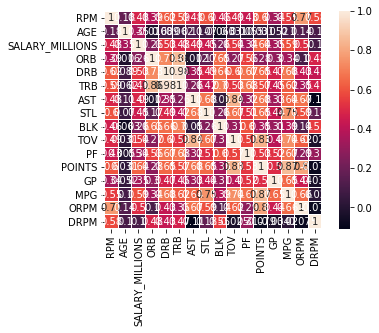

In [10]:
sns.heatmap(coor, square=True, linewidths=0.02, annot=True)
# annot-是否在热力图中显示数据
# seaborn中的heatmap函数，是将多维度数值变量按数值大小进行交叉热图展示。

plt.show()

由相关性分析的heatmap图可以看出，RPM值与年龄的相关性最弱，与“进攻效率值-ORPM”、“场均得分-POINTS”、“场均抢断数-STL”等比赛技术数据的相关性最强。

我在接下来的分析中将把RPM作为评价一个球员能力及状态的直观反应因素之一。

## 球员数据分析

### 基本分析
此处练习了一下pandas基本的数据框相关操作，包括提取部分列、head()展示、排序等，简单通过几个维度的展示，笼统地看一下16-17赛季那些球员冲在联盟的最前头。

In [6]:
# 薪资最高的10名运动员

data.loc[:, ['PLAYER', 'SALARY_MILLIONS', 'RPM', 'AGE', 'MPG']
         ].sort_values(by='SALARY_MILLIONS', ascending=False).head(10)

,PLAYER,SALARY_MILLIONS,RPM,AGE,MPG
6,LeBron James,30.96,8.42,32,37.8
25,Mike Conley,26.54,4.47,29,33.2
67,Al Horford,26.54,1.82,30,32.3
0,Russell Westbrook,26.50,6.27,28,34.6
1,James Harden,26.50,4.81,27,36.4
10,Kevin Durant,26.50,5.74,28,33.4
64,Dirk Nowitzki,25.00,0.26,38,26.4
19,Carmelo Anthony,24.56,0.12,32,34.3
5,Damian Lillard,24.33,3.14,26,35.9
34,Dwyane Wade,23.20,-0.91,35,29.9


勒布朗詹姆斯为该赛季薪水最高的球员，麦克康利拿到了大合同，但是在群星璀璨的薪金榜单上略显黯淡。同样出现在榜单的还有威少、哈登、杜兰特等球星，库里由于之前的合同太小，并没有出现在前10名里。

In [7]:
# 效率值最高的10名运动员

data.loc[:, ['PLAYER', 'RPM', 'SALARY_MILLIONS', 'AGE', 'MPG']
         ].sort_values(by='RPM', ascending=False).head(10)

,PLAYER,RPM,SALARY_MILLIONS,AGE,MPG
6,LeBron James,8.42,30.96,32,37.8
37,Chris Paul,7.92,22.87,31,31.5
8,Stephen Curry,7.41,12.11,28,33.4
120,Draymond Green,7.14,15.33,26,32.5
7,Kawhi Leonard,7.08,17.64,25,33.4
44,Nikola Jokic,6.73,1.36,21,27.9
12,Jimmy Butler,6.62,17.55,27,37.0
66,Rudy Gobert,6.37,2.12,24,33.9
0,Russell Westbrook,6.27,26.50,28,34.6
10,Kevin Durant,5.74,26.50,28,33.4


詹皇拿着联盟最高的薪水，打球也毫不含糊，效率值排名第一。保罗和库里紧随其后，在前10的榜单里，宇宙勇占据3席。值得一提的是，掘金队的约基奇和爵士队的戈贝尔，拿着较为微薄的工资却打出了联盟前10的效率，这也为他们接下来的大合同奠定了基础。

In [8]:
# 出场时间最高的10名运动员

data.loc[:, ['PLAYER', 'RPM', 'SALARY_MILLIONS', 'AGE', 'MPG']
         ].sort_values(by='MPG', ascending=False).head(10)

,PLAYER,RPM,SALARY_MILLIONS,AGE,MPG
6,LeBron James,8.42,30.96,32,37.8
32,Zach LaVine,-2.97,2.24,21,37.2
14,Andrew Wiggins,-1.60,6.01,21,37.2
11,Karl-Anthony Towns,2.13,5.96,21,37.0
12,Jimmy Butler,6.62,17.55,27,37.0
17,John Wall,2.26,16.96,26,36.4
1,James Harden,4.81,26.50,27,36.4
3,Anthony Davis,4.35,22.12,23,36.1
5,Damian Lillard,3.14,24.33,26,35.9
13,Paul George,2.58,18.31,26,35.9


### Seaborn常用的三个数据可视化方法

#### 单变量：

我们先利用seaborn中的distplot绘图来分别看一下球员薪水、效率值、年龄这三个信息的分布情况，上代码：

/Users/sherwin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarn

Text(0,0.5,'AGE')

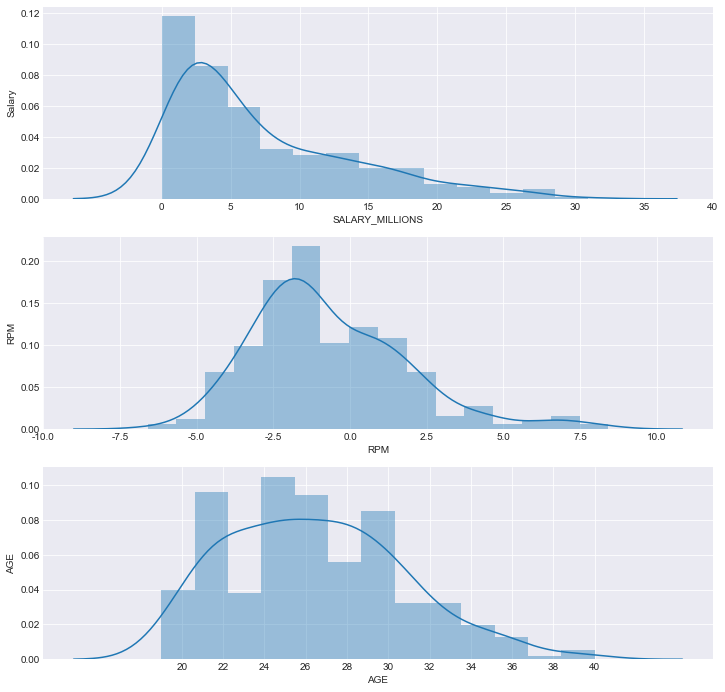

In [9]:
# 利用seaborn中的distplot绘图来分别看一下球员薪水、效率值、年龄这三个信息的分布情况

# 分布及核密度展示
sns.set_style('darkgrid')  # 设置seaborn的面板风格

plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)  # 拆分页面，多图展示
sns.distplot(data['SALARY_MILLIONS'])
plt.xticks(np.linspace(0, 40, 9))  # 把0--40之间,分成9个间隔(包含0和40)
plt.ylabel('Salary', size=10)

plt.subplot(3, 1, 2)
sns.distplot(data['RPM'])
plt.xticks(np.linspace(-10, 10, 9))
plt.ylabel('RPM', size=10) 

plt.subplot(3, 1, 3)
sns.distplot(data['AGE'])
plt.xticks(np.linspace(20, 40, 11))
plt.ylabel('AGE', size=10)

可见年龄和效率值更符合正态分布，而球员薪水更像一个偏态分布，拿高薪的球员占据较小的比例。这些与我们的主管感受基本一致，那么这些变量之间是否有什么隐藏的关系呢？这里可以用seaborn中的pairplot绘图展示多个变量之间的关系：

#### 双变量：

/Users/sherwin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'height'
  s)


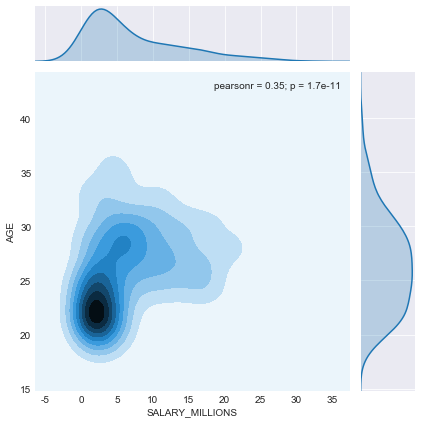

In [10]:
# 使用jointplot查看年龄和薪水之间的关系

dat1 = data.loc[:, ['RPM', 'SALARY_MILLIONS', 'AGE', 'POINTS']]
sns.jointplot(dat1.SALARY_MILLIONS, dat1.AGE, kind='kde', height=8)
plt.show()

上图展示的是球员薪水与年龄的关系，采用不同的kind方式（等高线图/hex/散点等），我们可以整体感受一下年龄和薪水的集中特点，大部分球员集中在22-25岁拿到5million以下的薪水，当然也有“年少成名”和“越老越妖”的情况。

#### 多变量：

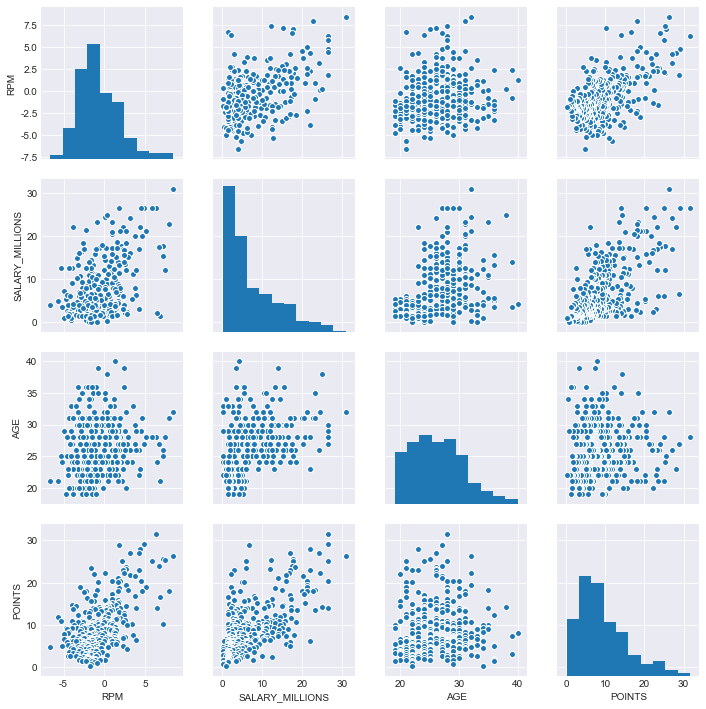

In [11]:
# 用seaborn中的pairplot绘图展示多个变量之间的关系

dat1=data.loc[:,['RPM','SALARY_MILLIONS','AGE','POINTS']]
sns.pairplot(dat1) #相关性展示，斜对角为分布展示，可以直观地看变量是否具有现行关系 
plt.show()

上图展示的是球员薪水、效率值、年龄及场均得分四个变量间的两两相关关系，对角线展示的是本身的分布图，由散点的趋势我们可以看出不同特征的相关程度。

整体看各维度的相关性都不是很强，正负值与薪水和场均得分呈较弱的正相关性，而年龄这一属性和其他的变量相关性较弱，究竟是家有一老如有一宝还是廉颇老矣，接下来我们从年龄维度入手进一步分析.

### 衍生变量的一些可视化实践-以年龄为例

在已有的数据集里想要生成新的变量，例如：把球员按年龄分为老中青三代，可以借助定义一个函数，再利用apply的方式，生成新的变量。

In [12]:
# 思路tips: 根据已有变量生成新的变量
data['avg_point'] = data['POINTS']/data['MP']  # 每分钟得分

# 分割年龄
def age_cut(df):
    if df.AGE <= 24:
        return 'young'
    elif df.AGE >= 30:
        return 'old'
    else:
        return 'best'


data['age_cut'] = data.apply(lambda x: age_cut(x), axis=1)  # 球员是否处于黄金年龄
data['cnt'] = 1  # 计数用

In [13]:
data.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,avg_point,age_cut,cnt
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,0.913295,best,1
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,0.799451,best,1
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,-3.89,1.83,8.19,16.1,99.84,51,6.59,0.855030,best,1
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,0.775623,young,1
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,0.789474,best,1


既然得到了老中青三代的标签，我们来看一下不同年龄段球员的RPM（正负值）与薪水之前的关系如何：

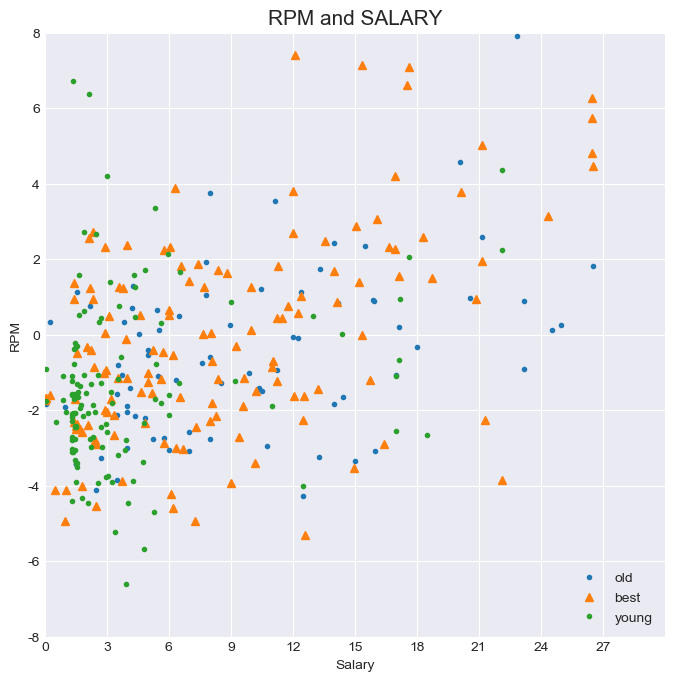

In [14]:
# 球员薪水与效率值   按年龄段来看
sns.set_style('darkgrid')  # 设置seaborn的面板风格
plt.figure(figsize=(8, 8), dpi=100)
plt.title('RPM and SALARY', size=15)

X1 = data.loc[data.age_cut == 'old'].SALARY_MILLIONS
Y1 = data.loc[data.age_cut == 'old'].RPM
plt.plot(X1, Y1, '.')

X2 = data.loc[data.age_cut == 'best'].SALARY_MILLIONS
Y2 = data.loc[data.age_cut == 'best'].RPM
plt.plot(X2, Y2, '^')

X3 = data.loc[data.age_cut == 'young'].SALARY_MILLIONS
Y3 = data.loc[data.age_cut == 'young'].RPM
plt.plot(X3, Y3, '.')

plt.xlim(0, 30)
plt.ylim(-8, 8)
plt.xlabel('Salary')
plt.ylabel('RPM')
plt.xticks(np.arange(0, 30, 3))
plt.legend(['old', 'best', 'young'])

点图横坐标为球员薪水，纵坐标为效率值。可以观测到：

绝大部分的年轻球员拿着较低的薪水，数据非常集中。有两个离群点，是上文提到的戈贝尔和约基奇，两个小兄弟前途无量啊。

黄金年龄的球员和老球员的数据相对发散，黄金年龄球员薪水与效率值正相关性更强。第一集团有几个全明星排头兵。

老球员过了呼风唤雨的年纪，运动状态有所下滑，“高薪低效”的球员也稍微多一些。


用上篇的方法看一下老中青三代各技术统计的分布情况：

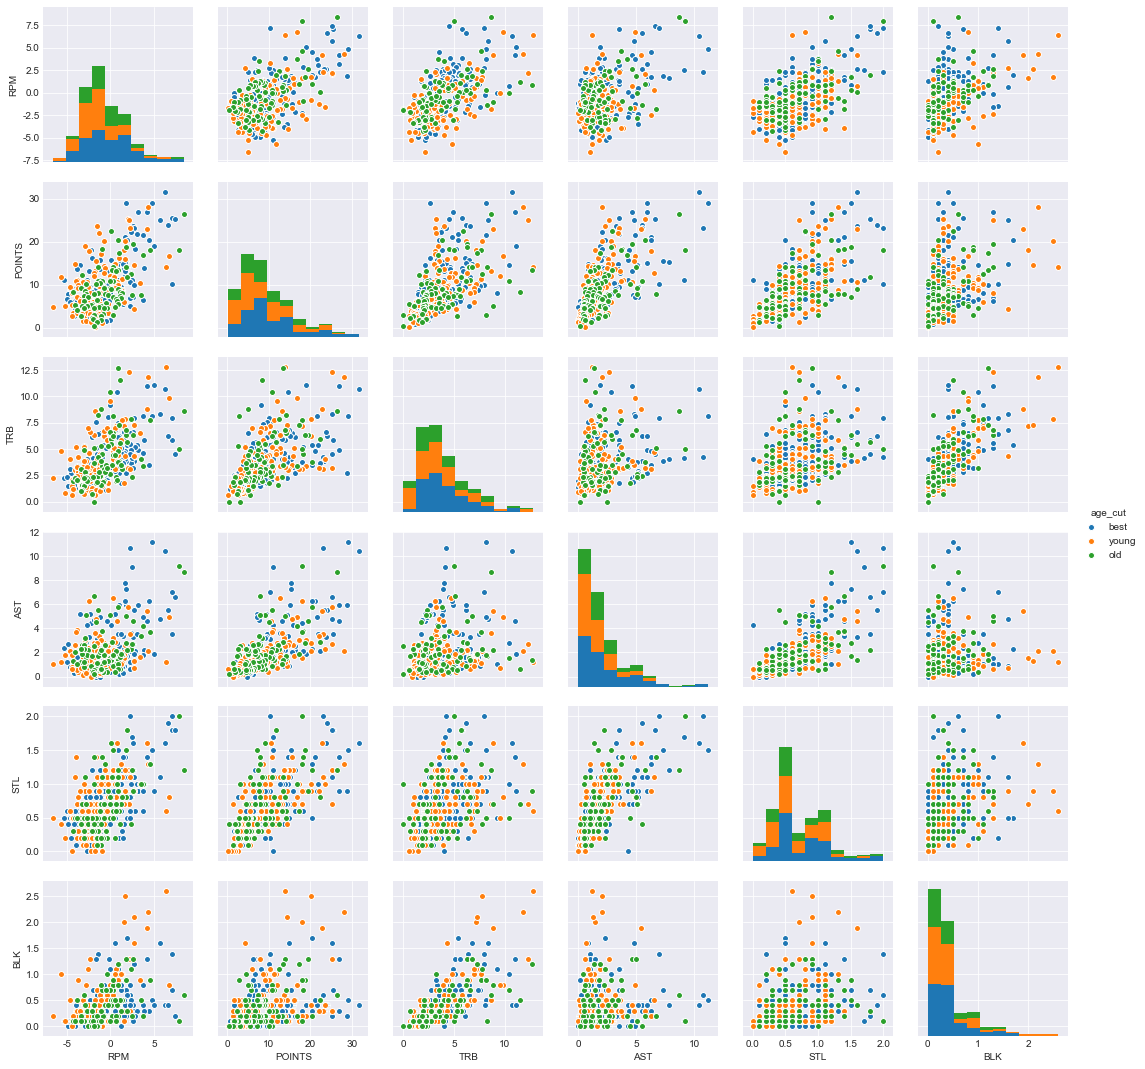

In [15]:
dat2=data.loc[:,['RPM','POINTS','TRB','AST','STL','BLK','age_cut']]
sns.pairplot(dat2,hue='age_cut')

## 球队数据分析

### 球队薪资排行

将数据按球队分组，平均薪水降序排列，看一下联盟十大土豪球队：

In [16]:
# 分组操作 按球队

dat_grp = data.groupby(by=['TEAM'], as_index=False).agg(
    {'SALARY_MILLIONS': np.mean, 'RPM': np.mean, 'PLAYER': np.size})

dat_grp.sort_values(by='SALARY_MILLIONS', ascending=False).head(10)

,TEAM,SALARY_MILLIONS,RPM,PLAYER
9,CLE,17.095000,2.566667,6
18,GS,12.701429,3.478571,7
43,POR,9.730000,-1.260000,10
48,WSH,9.628889,-0.506667,9
39,ORL,9.490000,-2.066667,9
44,SA,9.347273,0.901818,11
26,MEM,8.705000,-0.854167,12
35,NY,8.612727,-1.182727,11
11,DAL,8.480000,-1.037143,7
24,LAC,8.266000,0.319000,10


骑士队和勇士队已超高的薪水排在这份榜单的前两名，群星璀璨的他们最终在季后赛中一路厮杀，双双闯入分区决赛。

排在第三的开拓者有10名球员上榜，可谓后补活力充沛。球队薪金结构的健康与否对球队的发展至关重要。

### 球队年龄结构

先胖不算胖，后胖压倒炕，优质的年轻球员储备是保持球队竞争性的密匙。

我按照分球队分年龄段，上榜球员降序排列，如上榜球员数相同，则按效率值降序排列。

In [18]:
# 分组操作 按场上位置

dat_grp2 = data.groupby(by=['TEAM', 'age_cut'], as_index=False).agg(
    {'SALARY_MILLIONS': np.mean, 'RPM': np.mean, 'PLAYER': np.size})

dat_grp2.sort_values(by=['PLAYER', 'RPM'], ascending=False).head(15)

,TEAM,age_cut,SALARY_MILLIONS,RPM,PLAYER
14,CHA,young,3.835000,-0.362500,8
9,BOS,best,7.034286,0.647143,7
105,TOR,young,4.158571,-0.555714,7
11,BOS,young,2.337143,-1.821429,7
67,MIN,best,5.560000,0.828333,6
32,DEN,young,2.181667,-0.206667,6
36,DET,best,7.638333,-0.386667,6
30,DEN,best,8.336667,-0.586667,6
63,MIL,best,9.708333,-0.625000,6
70,NO,best,6.720000,-0.738333,6


在这份榜单里，排在榜首的公牛队(CHA)有年轻球员8人，但效率值偏低，小伙子们还需努力啊。

绿凯(BOS)不得了，黄金年龄球员和年轻球员共14人，效率值较高，未来一片光明。

年轻的森林狼(MIN)有6名黄金年龄球员，老马刺(SA)有5为年长球员，一老一小效率值还都不错。

最牛的还属宇宙勇(GS)，5名黄金年龄球员效率值为恐怖的4.7,明星在手天下我有！

### 球队综合实力分析

最后我们来看看球队综合实力：

按照效率值降序排列前10名球队的相关信息如下：

In [19]:
# 数据可视化 按球队

dat_grp3 = data.groupby(by=['TEAM'], as_index=False).agg({'SALARY_MILLIONS': np.mean,
                                                          'RPM': np.mean,
                                                          'PLAYER': np.size,
                                                          'POINTS': np.mean,
                                                          'eFG%': np.mean,
                                                          'MPG': np.mean,
                                                          'AGE': np.mean})
dat_grp3 = dat_grp3.loc[dat_grp3.PLAYER > 5]
dat_grp3.sort_values(by=['RPM'], ascending=False).head(10)

,TEAM,SALARY_MILLIONS,RPM,PLAYER,POINTS,eFG%,MPG,AGE
18,GS,12.701429,3.478571,7,14.528571,0.575143,26.700000,28.714286
9,CLE,17.095000,2.566667,6,15.883333,0.555833,29.766667,28.000000
44,SA,9.347273,0.901818,11,9.818182,0.524182,21.472727,29.545455
24,LAC,8.266000,0.319000,10,8.740000,0.462800,18.700000,28.600000
38,OKC,8.060000,0.255556,9,10.677778,0.518111,22.566667,25.666667
47,UTAH,6.471667,-0.107500,12,10.233333,0.515917,24.008333,26.666667
6,CHA,6.779231,-0.277692,13,8.700000,0.447923,20.884615,25.076923
46,TOR,5.668000,-0.319000,10,5.800000,0.497800,17.170000,24.200000
31,NO,8.044444,-0.327778,9,9.411111,0.523222,24.322222,27.444444
5,BOS,6.142667,-0.426667,15,8.426667,0.565067,18.886667,24.666667


勇士(GS)和骑士(CLE)占据前两名的位置，效率值反映球队实力的事实情况。

老马刺(SA)排名第三，平均年龄达29.5岁排名第一，更新血液迫在眉睫。

雷霆(OKC)由于大威少的存在能排在第5位，各项数据中规中矩。

利用箱线图和小提琴图看着10支球队的相关数据

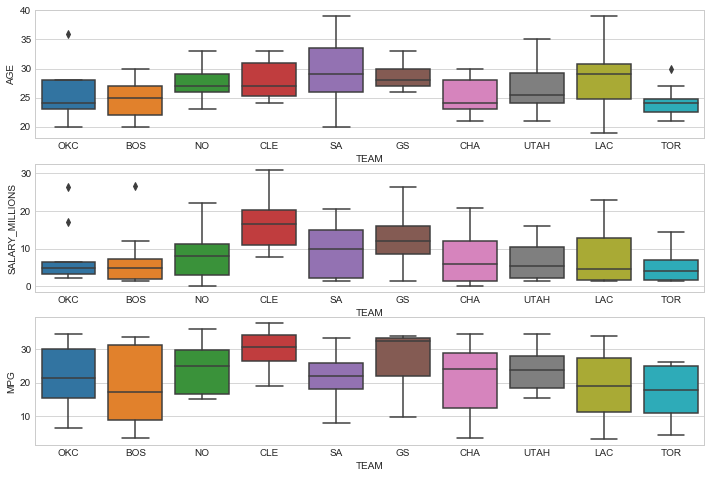

In [20]:
# 利用箱线图和小提琴图看着10支球队的相关数据
# 箱线图

sns.set_style('whitegrid')  # 设置seaborn的面板风格
plt.figure(figsize=(12, 8))
dat_grp4 = data[data['TEAM'].isin(
     )]

plt.subplot(3, 1, 1)
sns.boxplot(x='TEAM', y='AGE', data=dat_grp4)
plt.subplot(3, 1, 2)
sns.boxplot(x='TEAM', y='SALARY_MILLIONS', data=dat_grp4)
plt.subplot(3, 1, 3)
sns.boxplot(x='TEAM', y='MPG', data=dat_grp4)

/Users/sherwin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


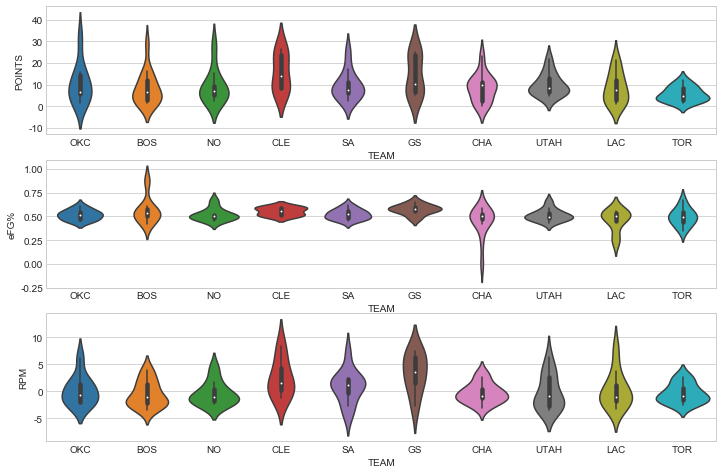

In [21]:
# 利用箱线图和小提琴图看着10支球队的相关数据
# 小提琴图

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.violinplot(x='TEAM', y='POINTS', data=dat_grp4)
plt.subplot(3, 1, 2)
sns.violinplot(x='TEAM', y='eFG%', data=dat_grp4)
plt.subplot(3, 1, 3)
sns.violinplot(x='TEAM', y='RPM', data=dat_grp4)

从年龄结构看，老马刺年龄跨度最大，年龄中位数最高。猛龙队最年轻且年龄跨度最小，后劲十足。

从球队薪金看，勇士和骑士最高，俄村雷霆在失去杜兰特后栽了大跟头，薪金健康情况堪忧。

从出场时间看，骑士队最高且跨度低，小团体战斗能力出众。

从得分来看，骑士和勇士整体出众。雷霆的威少、绿军的小托马斯、醍醐的浓眉哥以及马刺的伦纳德均是各队的离群点，双拳难敌四手。

从命中率看，命中率各队非常集中，绿凯的小托马刺作为地表最强175远远高于其他人。

从效率值看，骑士和勇士是大赢家。

# 结语

NBA每天都会如期而至！随着科技的进步我们可以更好的对篮球比赛的数据进行记录和分析，

这使得我们能更好地理解篮球，理解球员，结合我们的专业知识和兴趣爱好，更好地享受篮球比赛的无穷魅力。